# Seinfeld

In [1]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Acquire

In [2]:
df = pd.read_csv('seinfeld_episodes.csv')
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,"Good News, Bad News",Art Wolff,Larry David & Jerry Seinfeld,1989-07-05,101,15400000.0
1,1,2,2,The Stakeout,Tom Cherones,Larry David & Jerry Seinfeld,1990-05-31,102,22500000.0
2,1,3,3,The Robbery,Tom Cherones,Matt Goldman,1990-06-07,103,19700000.0
3,1,4,4,Male Unbonding,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-14,104,19100000.0
4,1,5,5,The Stock Tip,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-21,105,19400000.0


In [3]:
df.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
175,9,20,176,The Puerto Rican Day,Andy Ackerman,"Alec Berg, Jennifer Crittenden, Spike Feresten...",1998-05-07,920,38780000.0
176,9,21,177,The Chronicle,Andy Ackerman,Darin Henry,1998-05-14,921,58530000.0
177,9,22,178,The Chronicle,Andy Ackerman,Darin Henry,1998-05-14,922,58530000.0
178,9,23,179,The Finale,Andy Ackerman,Larry David,1998-05-14,923,76260000.0
179,9,24,180,The Finale,Andy Ackerman,Larry David,1998-05-14,924,76260000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 180 non-null    int64  
 1   episode_num_in_season  180 non-null    int64  
 2   episode_num_overall    180 non-null    int64  
 3   title                  180 non-null    object 
 4   directed_by            180 non-null    object 
 5   written_by             180 non-null    object 
 6   original_air_date      180 non-null    object 
 7   prod_code              180 non-null    int64  
 8   us_viewers             179 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 12.8+ KB


In [5]:
# looking at the shape of the data
df.shape

(180, 9)

In [6]:
# checking for nulls in the data
df.isna().sum()

season                   0
episode_num_in_season    0
episode_num_overall      0
title                    0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               1
dtype: int64

In [7]:
df.loc[df.us_viewers.idxmax()]

season                               9
episode_num_in_season               23
episode_num_overall                179
title                       The Finale
directed_by              Andy Ackerman
written_by                 Larry David
original_air_date           1998-05-14
prod_code                          923
us_viewers                  76260000.0
Name: 178, dtype: object

Text(0.5, 1.0, 'Episode Popularity of The Office')

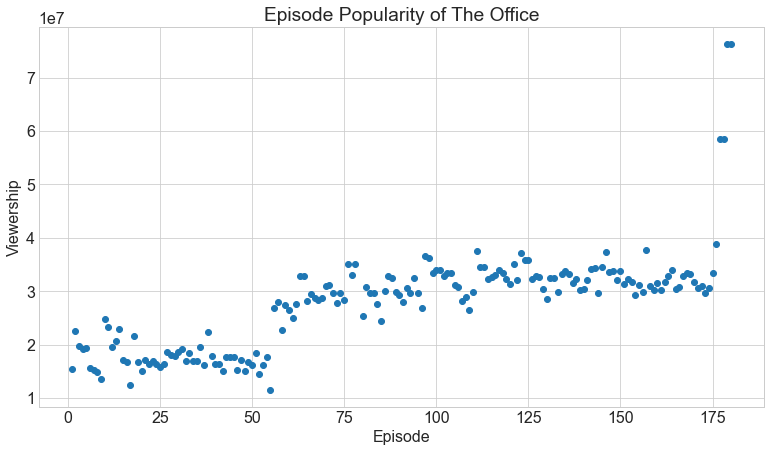

In [8]:
plt.scatter(df.episode_num_overall, df.us_viewers)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [9]:
df.describe()

,season,episode_num_in_season,episode_num_overall,prod_code,us_viewers
count,180.000000,180.000000,180.000000,180.000000,1.790000e+02
mean,5.600000,11.527778,90.500000,570.916667,2.796933e+07
std,2.293055,6.808991,52.105662,231.350272,9.295837e+06
min,1.000000,1.000000,1.000000,101.000000,1.150000e+07
25%,4.000000,5.750000,45.750000,405.750000,1.945000e+07
50%,6.000000,11.000000,90.500000,604.500000,2.980000e+07
75%,8.000000,17.000000,135.250000,801.250000,3.280000e+07
max,9.000000,24.000000,180.000000,924.000000,7.626000e+07


In [10]:
df.groupby('season').size().reset_index(name='episodes')

,season,episodes
0,1,5
1,2,12
2,3,23
3,4,24
4,5,22
5,6,24
6,7,24
7,8,22
8,9,24


In [11]:
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,"Good News, Bad News",Art Wolff,Larry David & Jerry Seinfeld,1989-07-05,101,15400000.0
1,1,2,2,The Stakeout,Tom Cherones,Larry David & Jerry Seinfeld,1990-05-31,102,22500000.0
2,1,3,3,The Robbery,Tom Cherones,Matt Goldman,1990-06-07,103,19700000.0
3,1,4,4,Male Unbonding,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-14,104,19100000.0
4,1,5,5,The Stock Tip,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-21,105,19400000.0


In [12]:
df.dtypes

season                     int64
episode_num_in_season      int64
episode_num_overall        int64
title                     object
directed_by               object
written_by                object
original_air_date         object
prod_code                  int64
us_viewers               float64
dtype: object

In [13]:
# adding columns for year, month, day, and weekday
#df['year'] = df.original_air_date.dt.year
#df['month'] = df.original_air_date.dt.month
#df['day'] = df.original_air_date.dt.day
#df['weekday'] = df.original_air_date.dt.day_name()
#df.head() # check_yo_head

In [14]:
# setting office data to datetime using the date column
df.original_air_date = pd.to_datetime(df.original_air_date)
df.dtypes

season                            int64
episode_num_in_season             int64
episode_num_overall               int64
title                            object
directed_by                      object
written_by                       object
original_air_date        datetime64[ns]
prod_code                         int64
us_viewers                      float64
dtype: object

In [15]:
df.columns.tolist()

['season',
 'episode_num_in_season',
 'episode_num_overall',
 'title',
 'directed_by',
 'written_by',
 'original_air_date',
 'prod_code',
 'us_viewers']

In [16]:
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,"Good News, Bad News",Art Wolff,Larry David & Jerry Seinfeld,1989-07-05,101,15400000.0
1,1,2,2,The Stakeout,Tom Cherones,Larry David & Jerry Seinfeld,1990-05-31,102,22500000.0
2,1,3,3,The Robbery,Tom Cherones,Matt Goldman,1990-06-07,103,19700000.0
3,1,4,4,Male Unbonding,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-14,104,19100000.0
4,1,5,5,The Stock Tip,Tom Cherones,Larry David & Jerry Seinfeld,1990-06-21,105,19400000.0


In [17]:
# changing the index of the office data to date after it has been changed to datetime
df = df.set_index('original_air_date').sort_index()
df.head() # check_yo_head

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,prod_code,us_viewers
original_air_date,,,,,,,,
1989-07-05,1,1,1,"Good News, Bad News",Art Wolff,Larry David & Jerry Seinfeld,101,15400000.0
1990-05-31,1,2,2,The Stakeout,Tom Cherones,Larry David & Jerry Seinfeld,102,22500000.0
1990-06-07,1,3,3,The Robbery,Tom Cherones,Matt Goldman,103,19700000.0
1990-06-14,1,4,4,Male Unbonding,Tom Cherones,Larry David & Jerry Seinfeld,104,19100000.0
1990-06-21,1,5,5,The Stock Tip,Tom Cherones,Larry David & Jerry Seinfeld,105,19400000.0


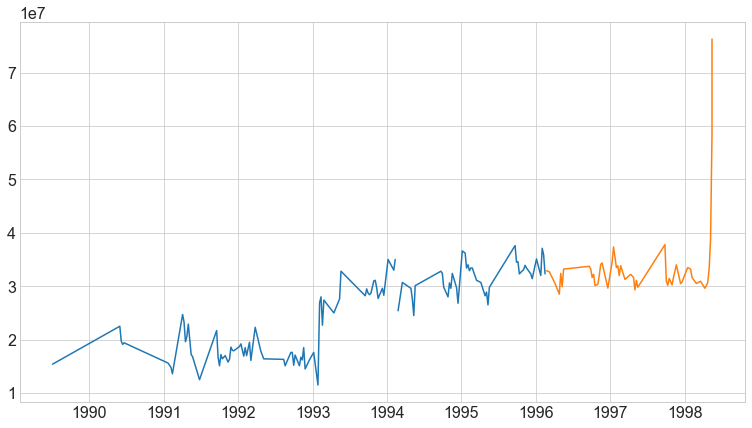

In [19]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.us_viewers)
plt.plot(test.index, test.us_viewers)